In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./Soil Nutrients.csv")
data.head()

,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Soil_Type,Season,N_Ratio,P_Ratio,K_Ratio
0,Strawberry,Moderate,Day Neutral,20.887923,747.860765,6.571548,13.091483,533.762876,91.197196,170.800381,118.670058,243.331211,20.369555,low_acidic,Loam,Summer,10.0,10.0,10.0
1,Strawberry,Moderate,Day Neutral,18.062721,711.104329,6.251806,13.063016,505.789101,91.939623,179.290364,121.020244,246.910378,20.402751,low_acidic,Loam,Spring,10.0,10.0,10.0
2,Strawberry,Moderate,Short Day Period,16.776782,774.038247,6.346916,12.945927,512.985617,91.387286,181.440732,116.936806,242.699601,19.158847,low_acidic,Loam,Summer,10.0,10.0,10.0
3,Strawberry,Moderate,Short Day Period,14.281000,665.633506,6.259598,13.318922,484.860067,91.254598,176.165282,122.233153,237.096892,20.265745,low_acidic,Loam,Summer,10.0,10.0,10.0
4,Strawberry,Moderate,Day Neutral,21.444490,806.531455,6.384368,13.312915,512.747307,92.354829,182.935334,126.088234,243.880364,20.397336,low_acidic,Loam,Spring,10.0,10.0,10.0


In [3]:
data.shape

(15400, 19)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15400 entries, 0 to 15399
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             15400 non-null  object 
 1   Fertility        15400 non-null  object 
 2   Photoperiod      15400 non-null  object 
 3   Temperature      15400 non-null  float64
 4   Rainfall         15400 non-null  float64
 5   pH               15400 non-null  float64
 6   Light_Hours      15400 non-null  float64
 7   Light_Intensity  15400 non-null  float64
 8   Rh               15400 non-null  float64
 9   Nitrogen         15400 non-null  float64
 10  Phosphorus       15400 non-null  float64
 11  Potassium        15400 non-null  float64
 12  Yield            15400 non-null  float64
 13  Category_pH      15400 non-null  object 
 14  Soil_Type        15400 non-null  object 
 15  Season           15400 non-null  object 
 16  N_Ratio          15400 non-null  float64
 17  P_Ratio     

In [5]:
categorical_cols = data.select_dtypes(include=["object"]).columns
numerical_cols = data.select_dtypes(include=["float64"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

Categorical Columns: ['Name', 'Fertility', 'Photoperiod', 'Category_pH', 'Soil_Type', 'Season']
Numerical Columns: ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'Nitrogen', 'Phosphorus', 'Potassium', 'Yield', 'N_Ratio', 'P_Ratio', 'K_Ratio']


In [6]:
data["Category_pH"].value_counts()

Category_pH
low_acidic      9466
neutral         4871
low_alkaline    1063
Name: count, dtype: int64

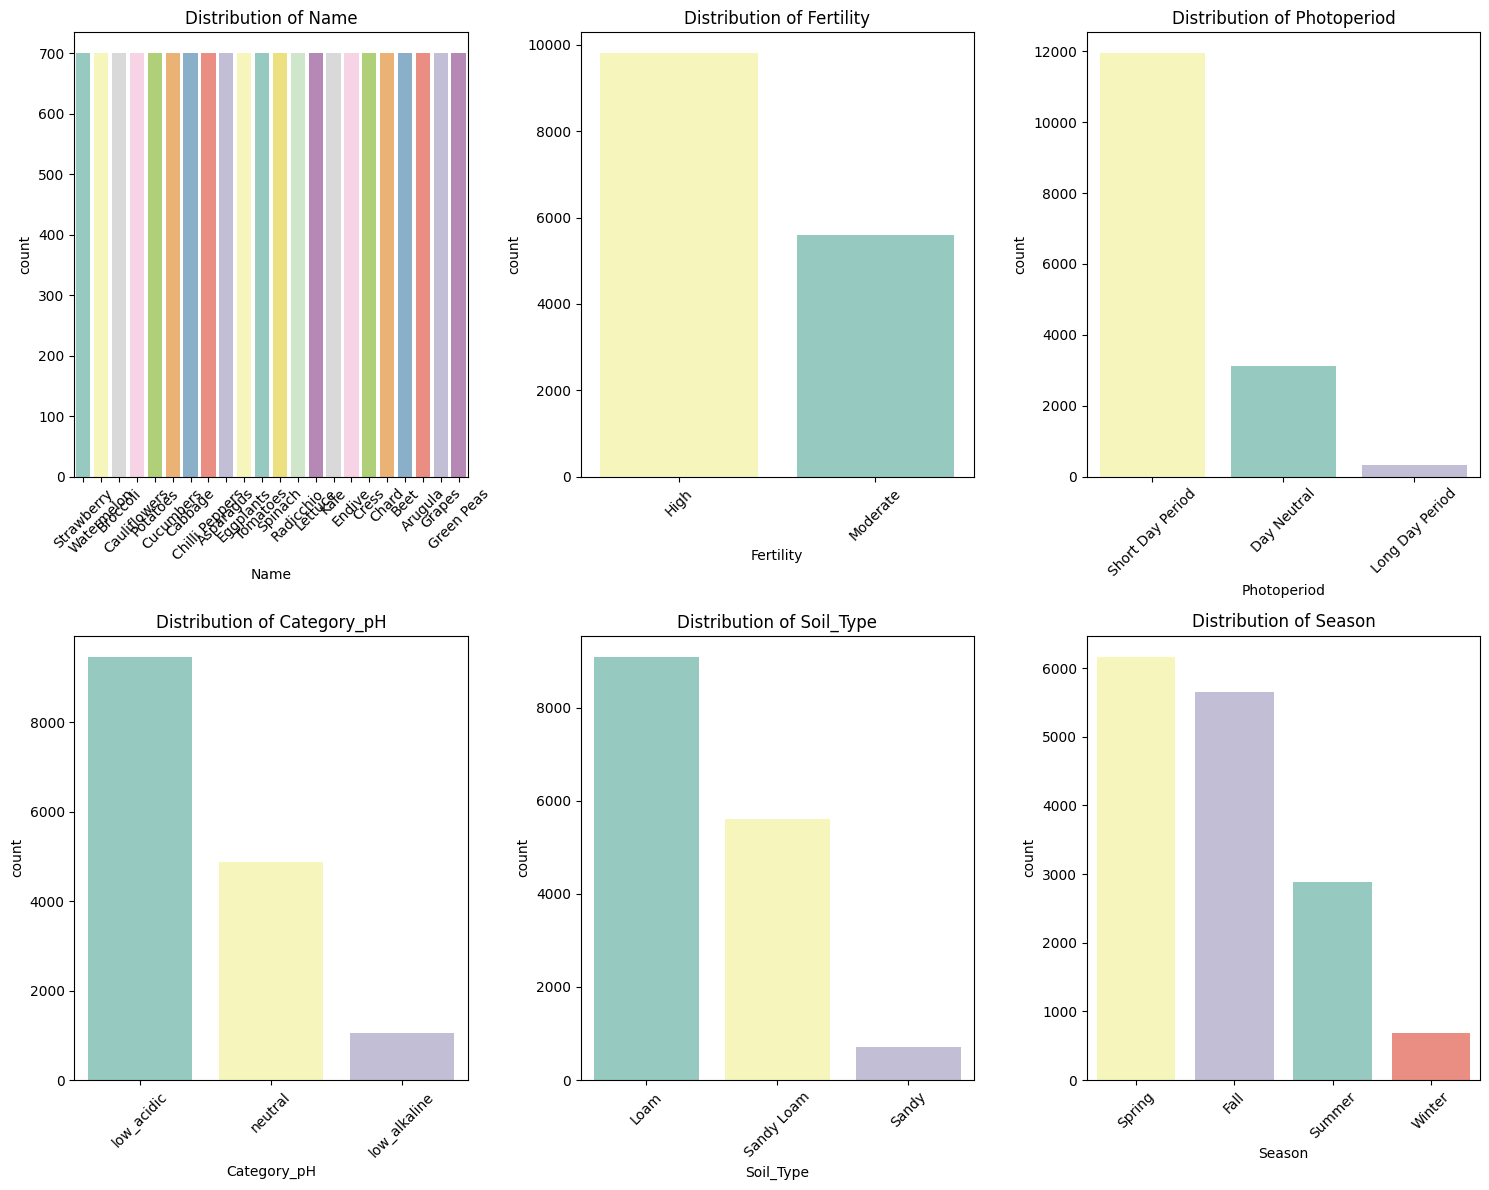

In [7]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) + 2) // 3, 3, i)
    sns.countplot(data=data, x=col, hue=col, palette="Set3", order=data[col].value_counts().index, legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

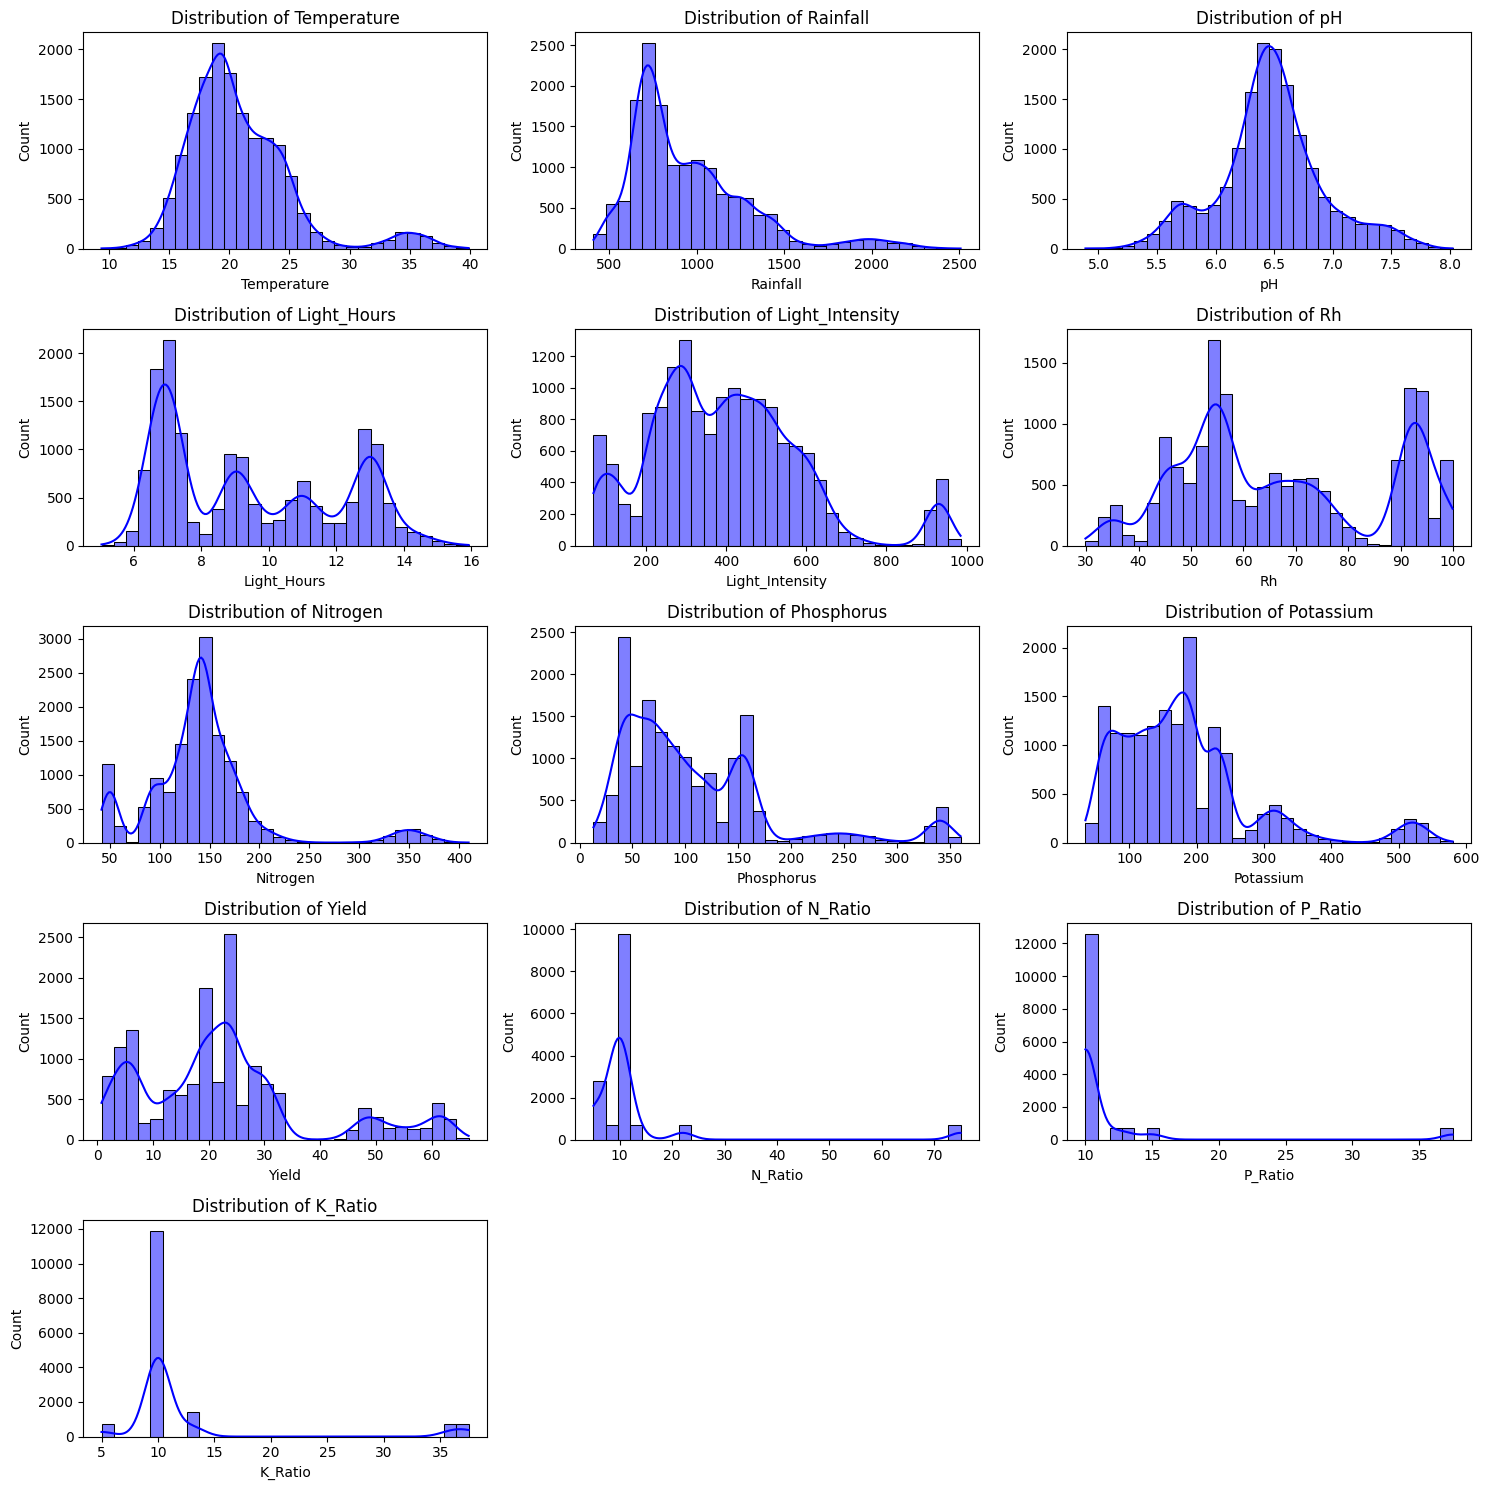

In [8]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.histplot(data[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

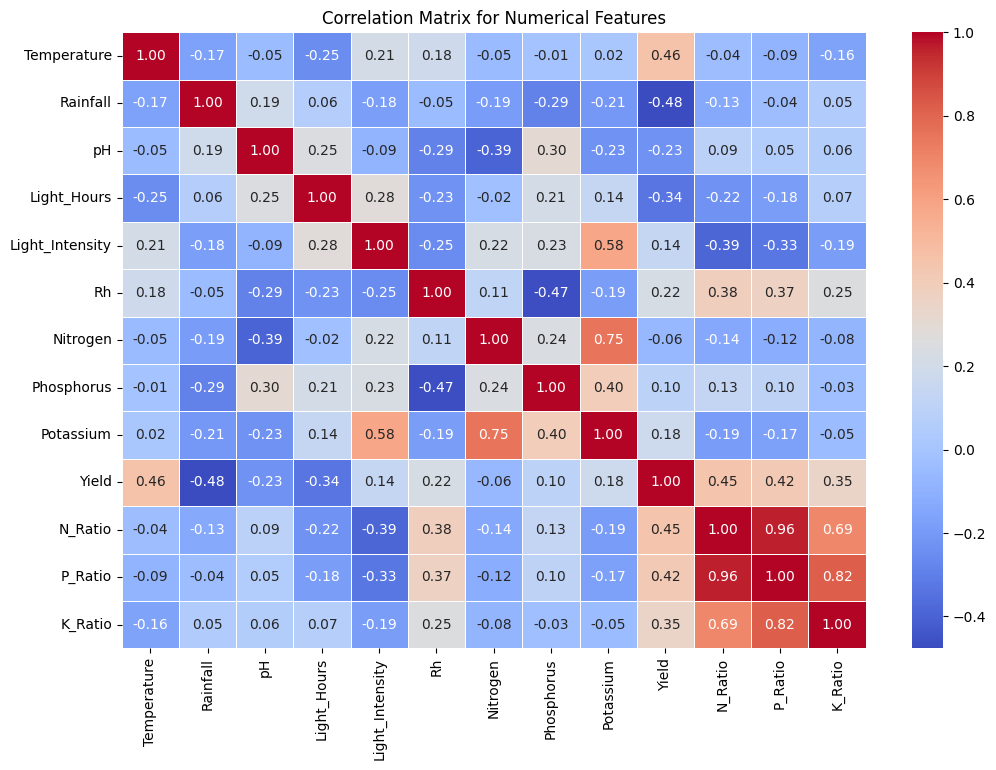

In [9]:
plt.figure(figsize=(12, 8))
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

In [10]:
import umap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
# Load the dataset (Assumed it is already loaded as `data`)
# Select numerical columns for clustering and dimensionality reduction

# Extract the relevant features
X = data[numerical_cols]

# Standardize the data (important for PCA and clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


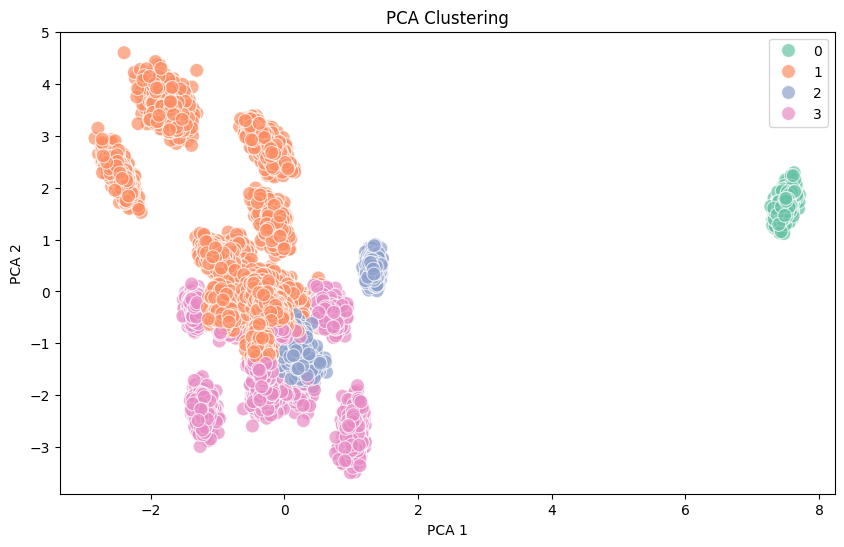

In [12]:
# Step 1: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Assume 4 clusters, you can change this
data["Cluster"] = kmeans.fit_predict(X_scaled)

# Step 2: Dimensionality Reduction (PCA, t-SNE, UMAP)
# 2.1 PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
data["PCA_1"] = pca_result[:, 0]
data["PCA_2"] = pca_result[:, 1]

# 3.1 PCA Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA_1", y="PCA_2", hue="Cluster", data=data, palette="Set2", s=100, alpha=0.7)
plt.title("PCA Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [14]:
# Step 1: Preprocess the Data
# 1.1 Handle categorical features with Label Encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

data.head()

,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,...,Yield,Category_pH,Soil_Type,Season,N_Ratio,P_Ratio,K_Ratio,Cluster,PCA_1,PCA_2
0,19,1,0,20.887923,747.860765,6.571548,13.091483,533.762876,91.197196,170.800381,...,20.369555,0,0,2,10.0,10.0,10.0,1,-0.716298,0.728199
1,19,1,0,18.062721,711.104329,6.251806,13.063016,505.789101,91.939623,179.290364,...,20.402751,0,0,1,10.0,10.0,10.0,1,-0.704028,0.863926
2,19,1,2,16.776782,774.038247,6.346916,12.945927,512.985617,91.387286,181.440732,...,19.158847,0,0,2,10.0,10.0,10.0,1,-0.735524,0.638734
3,19,1,2,14.281000,665.633506,6.259598,13.318922,484.860067,91.254598,176.165282,...,20.265745,0,0,2,10.0,10.0,10.0,1,-0.686134,0.625210
4,19,1,0,21.444490,806.531455,6.384368,13.312915,512.747307,92.354829,182.935334,...,20.397336,0,0,1,10.0,10.0,10.0,1,-0.730219,0.868763


In [15]:
# 1.2 Extract the target column (label) and features (X)
y = data["Category_pH"]  # Target column for classification (can change to any other target)
X = data.drop(columns=["Category_pH", "Cluster", "PCA_1", "PCA_2"])  # Drop target and clustering columns

In [16]:
# 1.3 Normalize the numerical data
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])
# 1.3 Normalize the numerical data

# 1.4 Split the data into training, validation, and test sets (80%, 10%, 10%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [17]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((12320, 18), (1540, 18), (1540, 18), (12320,), (1540,), (1540,))

In [18]:
X_train.head()

,Name,Fertility,Photoperiod,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Soil_Type,Season,N_Ratio,P_Ratio,K_Ratio
9629,-0.078811,-0.755929,0.530106,0.876401,1.203895,-0.162719,-0.304342,0.604206,-0.596008,-0.035298,0.651993,0.429109,0.566013,1.289620,1.278002,-0.544377,-0.295842,-0.317391
9671,-0.078811,-0.755929,0.530106,0.818099,1.465530,-0.581545,-0.053125,0.284321,-0.680552,0.000342,0.654766,0.455148,0.576489,1.289620,1.278002,-0.544377,-0.295842,-0.317391
4812,-0.394055,-0.755929,0.530106,-0.672357,1.583791,-0.196270,0.741733,-0.674337,-1.163156,-1.010384,0.052034,-0.757451,-1.373247,-0.814432,0.104824,-0.544377,-0.295842,-0.957996
6849,0.709299,1.322876,-1.950486,-0.831830,0.943098,-0.406331,1.563504,0.315604,-0.231520,-0.081881,-0.823448,0.523627,-0.093366,-0.814432,0.104824,-0.330514,0.571962,3.013755
12351,-0.236433,-0.755929,0.530106,1.115576,0.513871,1.480142,-0.163889,0.242241,0.162691,-1.614991,-1.187242,-1.022282,0.422131,1.289620,0.104824,-0.187940,-0.295842,-0.317391


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define models
models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),
}

# Train and evaluate models
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results[name] = model.score(X_test, y_test)

# Print model performance
print("Model Performance:")
for model_name, accuracy in model_results.items():
    print(f"{model_name}: {accuracy:.4f}")

Model Performance:
Gradient Boosting: 0.6468
XGBoost: 0.6305
Random Forest: 0.6279
Logistic Regression: 0.6338


In [20]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y)), activation="softmax"))
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
# Plotting the training history
plt.figure(figsize=(12, 6))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

/Users/rafi/.local/share/mise/installs/python/3.12.7/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-13 03:26:45.318766: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-13 03:26:45.318809: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-13 03:26:45.318828: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1741847205.318850  424715 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1741847205.318888  424715 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/de

Epoch 1/50


2025-03-13 03:26:46.006780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4297 - loss: 9.9808 - val_accuracy: 0.4987 - val_loss: 9.2333
Epoch 2/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3882 - loss: 10.5860 - val_accuracy: 0.2812 - val_loss: 3.7191
Epoch 3/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4061 - loss: 2.8452 - val_accuracy: 0.2740 - val_loss: 2.0892
Epoch 4/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4165 - loss: 2.8559 - val_accuracy: 0.4357 - val_loss: 1.5492
Epoch 5/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4789 - loss: 1.8400 - val_accuracy: 0.4461 - val_loss: 1.0997
Epoch 6/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5082 - loss: 1.3428 - val_accuracy: 0.5578 - val_loss: 0.9693
Epoch 7/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5285 - loss: 1.2334 - val_accuracy: 0.6149 - val_loss: 0.9009
Epoch 8/50
385/385 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5532 - loss: 1.0176 - val_accuracy: 0.50

KeyboardInterrupt: 